# Informacion del dataset

### **Sobre el Conjunto de Datos**
Clasificación de Países usando Aprendizaje No Supervisado (Clustering)
### **Objetivo:**
Categorizar los países en función de factores socioeconómicos y de salud que determinan el desarrollo general de cada nación.

#Preparación de datos
## Librerias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
!pip install -U kaleido
import kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.8 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan       90.20    10.00    7.58    44.90    1610   
1              Albania       16.60    28.00    6.55    48.60    9930   
2              Algeria       27.30    38.40    4.17    31.40   12900   
3               Angola      119.00    62.30    2.85    42.90    5900   
4  Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44       56.20       5.82    553  
1       4.49       76.30       1.65   4090  
2      16.10       76.50       2.89   4460  
3      22.40       60.10       6.16   3530  
4       1.44       76.80       2.13  12200

## Perfilamiento de datos

In [ ]:
!pip install -U ydata-profiling # Instala si es necesario

import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Data Profiling Report")

profile.to_notebook_iframe() # Muestra el reporte en el notebook

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Información de datos

In [ ]:
data.shape

(167, 10)

In [ ]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
data.describe()

child_mort  exports  health  imports    income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00    167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89  17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21  19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07    609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20   3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30   9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75  22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00 125000.00     104.00       82.80   

       total_fer      gdpp  
count     167.00    167.00  
mean        2.95  12964.16  
std         1.51  18328.70  
min         1.15    231.00  
25%         1.79   1330.00  
50%         2.41   4660.00  
75%         3.88  14050.00  
max         7.49 105000.00

## Análisis:
### child_mort:

La mortalidad infantil varía de 2.60 a 208, con un promedio de 38.27 y una alta desviación estándar (40.33), indicando gran variabilidad entre países.

### exports y imports:
Ambos indicadores como porcentajes del PIB tienen medias de 41.11 y 46.89, respectivamente, con un rango amplio (de valores mínimos cercanos a 0 hasta máximos de 200 y 174).

### health:
El gasto en salud es bajo en promedio (6.82), con una desviación moderada (2.75) y un máximo de 17.90.

### income y gdpp:
Estos indicadores financieros presentan los valores promedio más altos, pero también muestran gran variabilidad (desviaciones de 19278.07 y 18328.70 respectivamente), lo que sugiere disparidad económica entre países.

### inflation:
Promedio de 7.78, pero con gran dispersión (std = 10.57) y un rango amplio de -4.21 a 104, indicando variabilidad en la estabilidad económica.

### life_expec:
La esperanza de vida promedio es de 70.56 años, con una desviación de 8.89, y varía de 32.10 a 82.80.
total_fer: La tasa de fertilidad total promedio es 2.95, con valores entre 1.15 y 7.49, lo que refleja diferencias en tasas de natalidad.

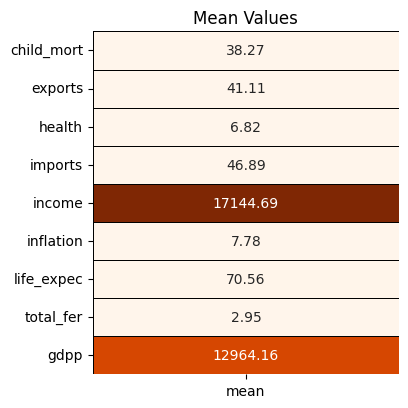

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)


La imagen muestra un gráfico de barras horizontales que representa los valores promedio de distintas métricas socioeconómicas de cada pais. Las métricas incluyen indicadores de salud, economía y desarrollo, distribuidas de la siguiente manera:

* child_mort: Promedio de mortalidad infantil (38.27)
* exports: Porcentaje promedio de exportaciones respecto al PIB (41.11)
* health: Gasto promedio en salud como porcentaje del PIB (6.82)
* imports: Porcentaje promedio de importaciones respecto al PIB (46.89)
* income: Promedio de ingreso nacional bruto per cápita (17144.69)
* inflation: Promedio de inflación anual (7.78)
* life_expec: Esperanza de vida promedio (70.56)
* total_fer: Tasa de fertilidad total promedio (2.95)
* gdpp: PIB per cápita promedio (12964.16)
* health: Gasto promedio en salud como porcentaje del PIB (6.82)
* imports: Porcentaje promedio de importaciones respecto al PIB (46.89)
* income: Promedio de ingreso nacional bruto per cápita (17144.69)
* inflation: Promedio de inflación anual (7.78)
* life_expec: Esperanza de vida promedio (70.56)
* total_fer: Tasa de fertilidad total promedio (2.95)
* gdpp: PIB per cápita promedio (12964.16)

Las barras están ordenadas de manera horizontal, y las de mayor valor se destacan con un color más oscuro (income y gdpp), lo que ayuda a identificar rápidamente las variables con los valores medios más altos. Este gráfico es útil para obtener una visión general de los valores medios en el dataset y puede servir como base para detectar patrones o outliers cuando se comparen estos valores medios con datos individuales.

# Análisis de datos exploratorios


In [ ]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


## Distribución de las caracteristicas

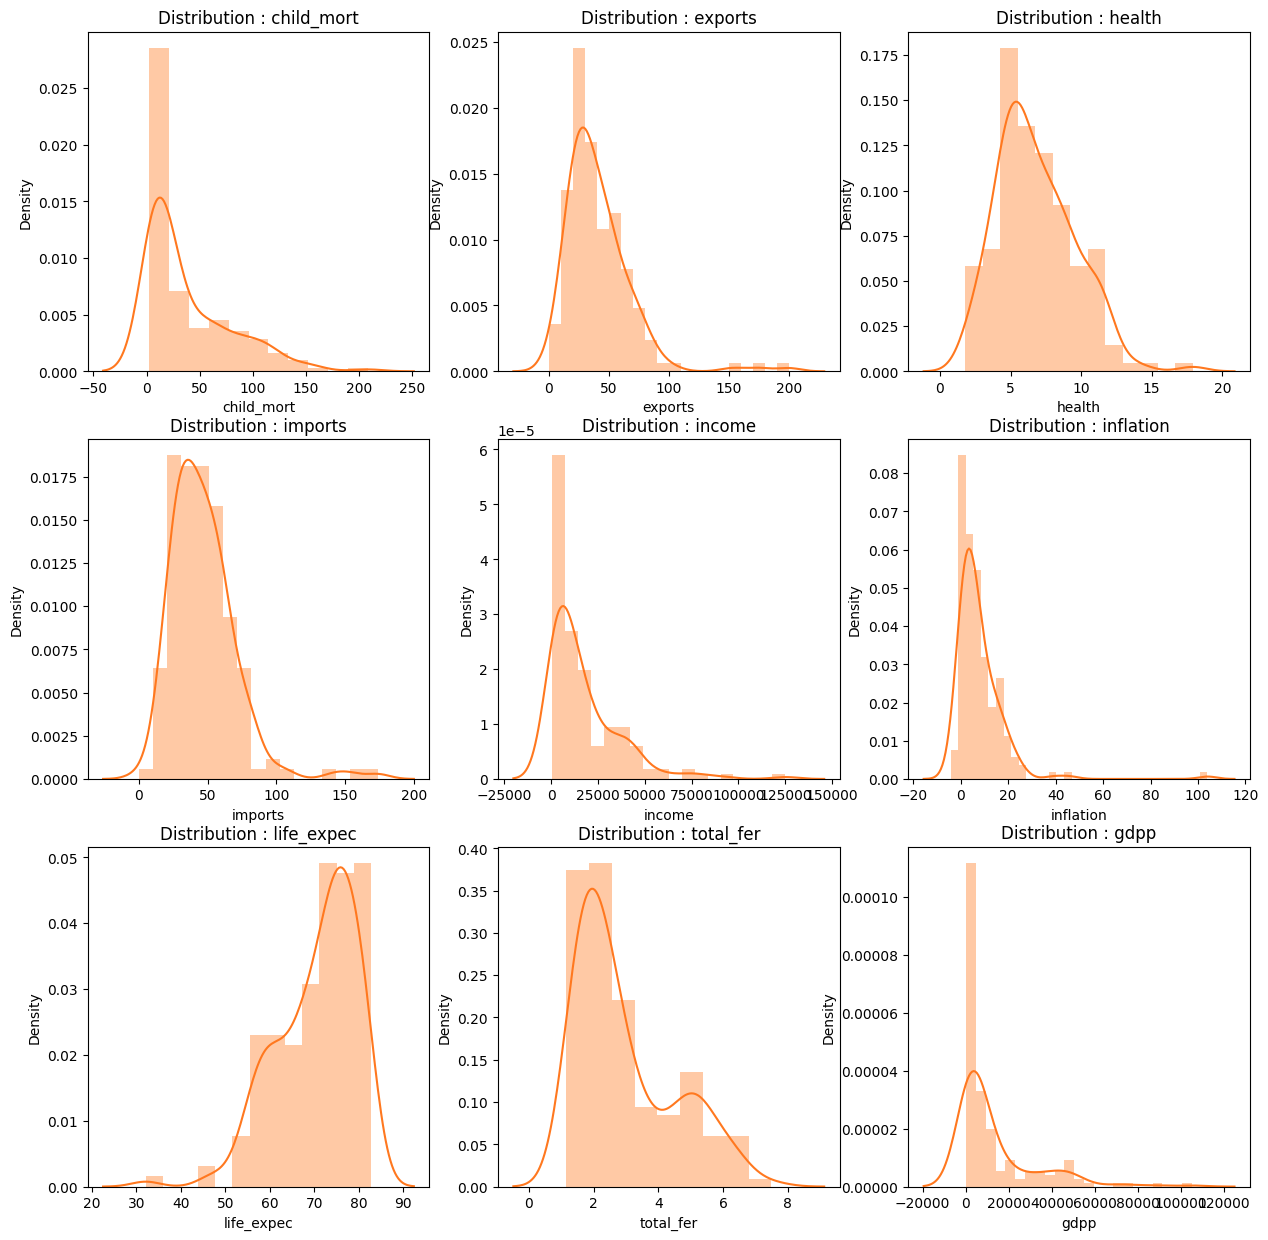

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [ ]:
len(data['country'].unique()) == len(data) #verificamos que no hay países repetidos en el dataset

True

## Principales caracteristicas numericas en cada pais (pobre, medio, rico)

Las siguientes gráficas nos ayudan a:

* **Identificar rápidamente patrones cruciales:** saber qué países tienen las tasas más altas de mortalidad infantil y requieren atención urgente.

* **Hacer comparaciones** entre distintos grupos de países para ver si existen diferencias marcadas en las diferentes categorias sociopóliticas analizadas, lo cual puede influir en la asignación de recursos.

* **Monitorear el impacto de las intervenciones:** Estas gráficas son utiles si se comparan a lo largo del tiempo, puede mostrar si los esfuerzos de ayuda están reduciendo las tasas en los países en riesgo.

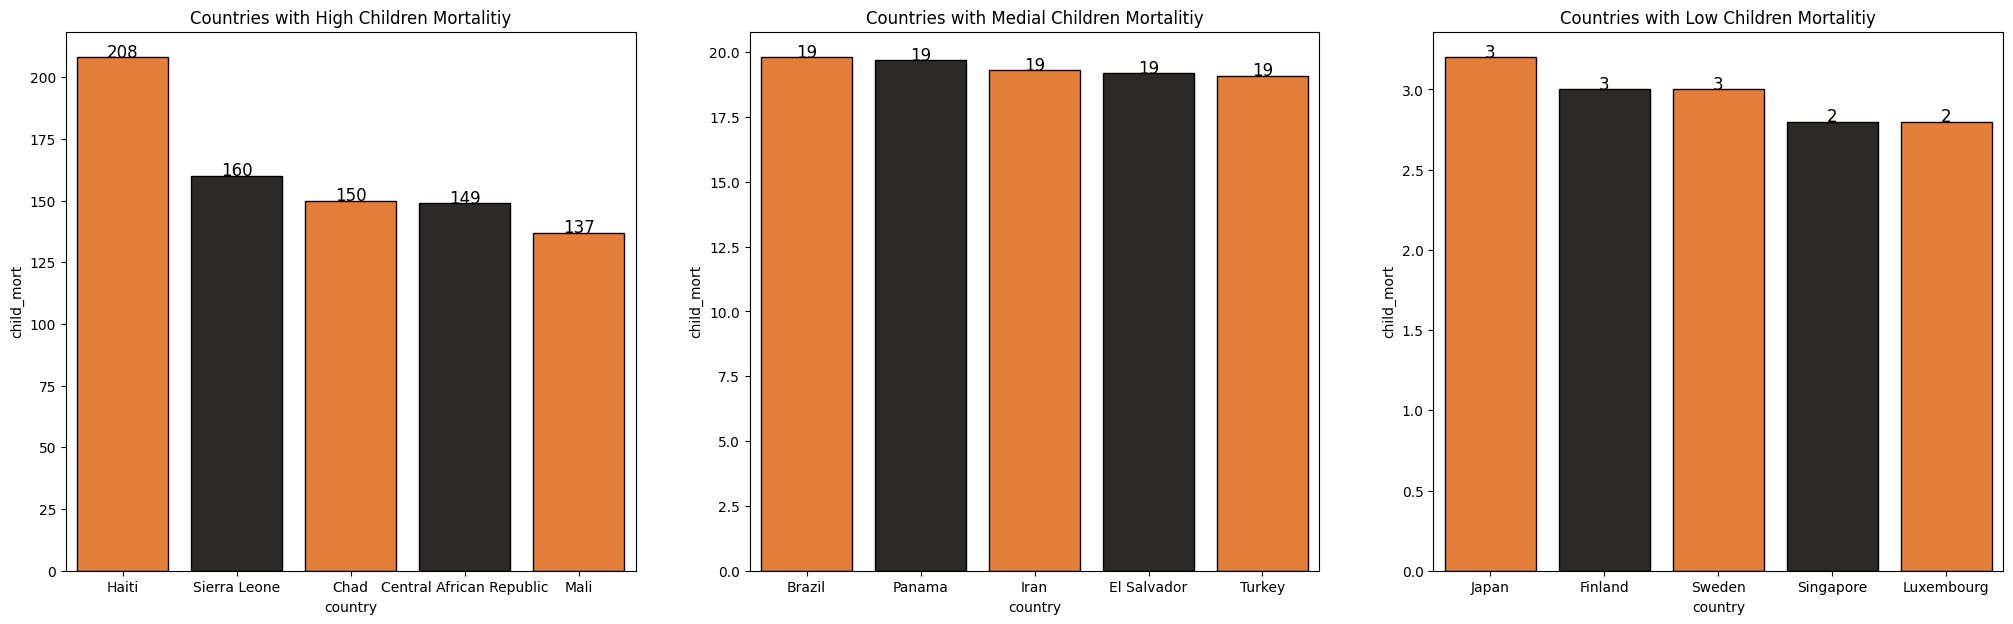

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

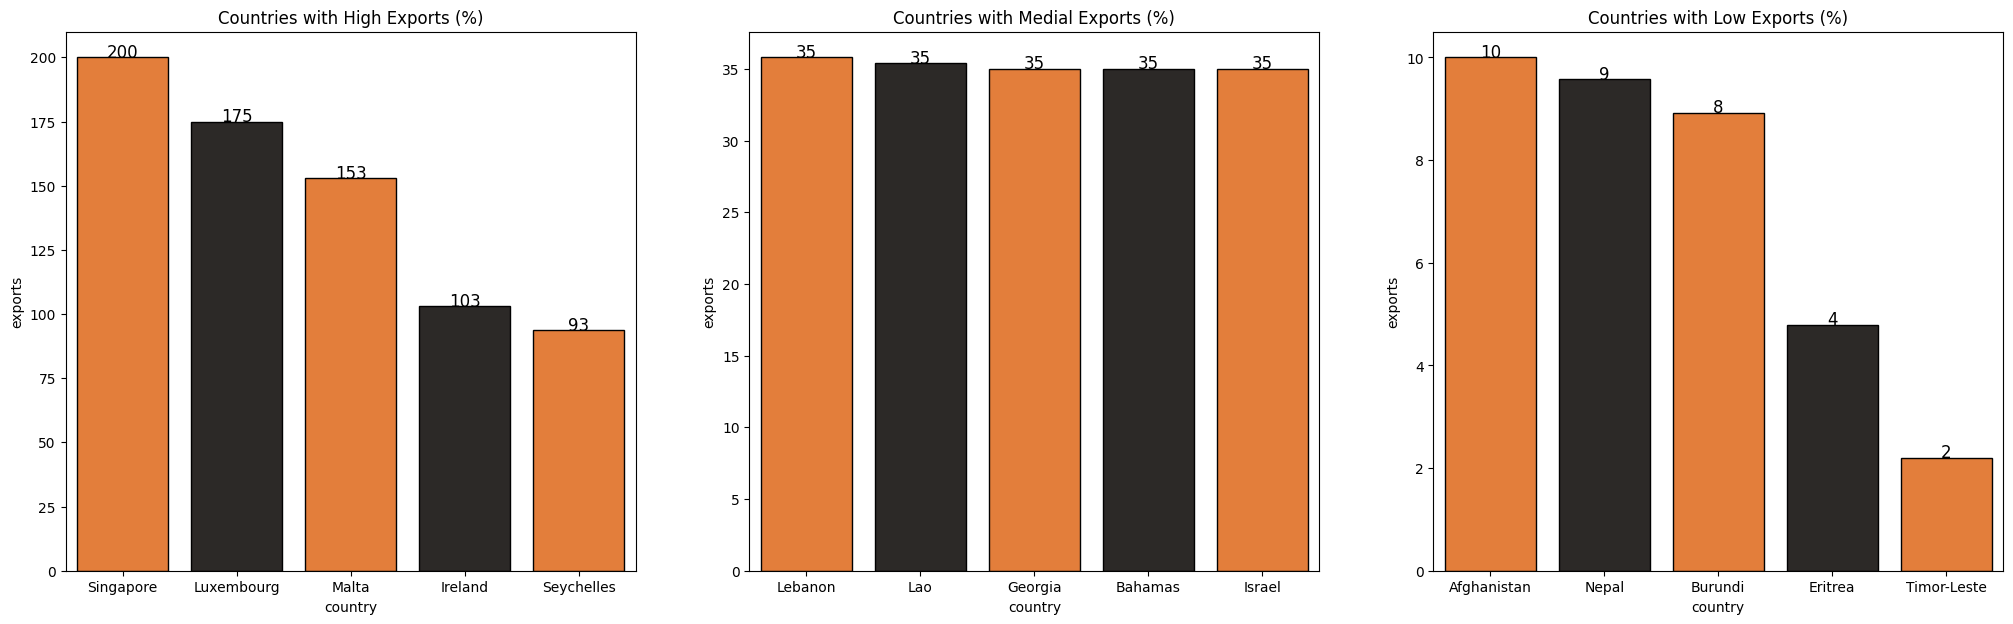

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

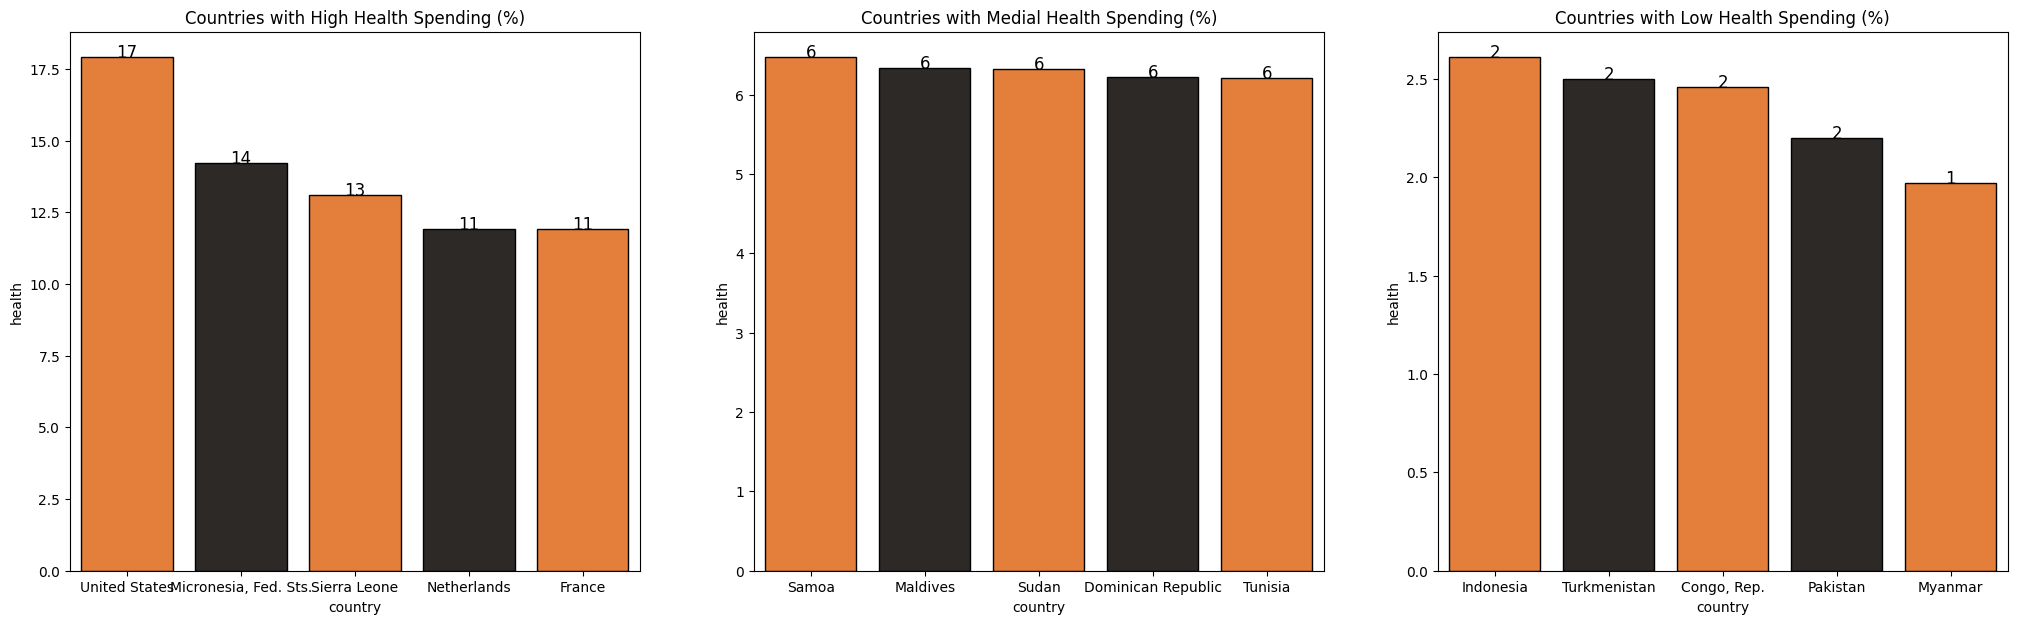

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

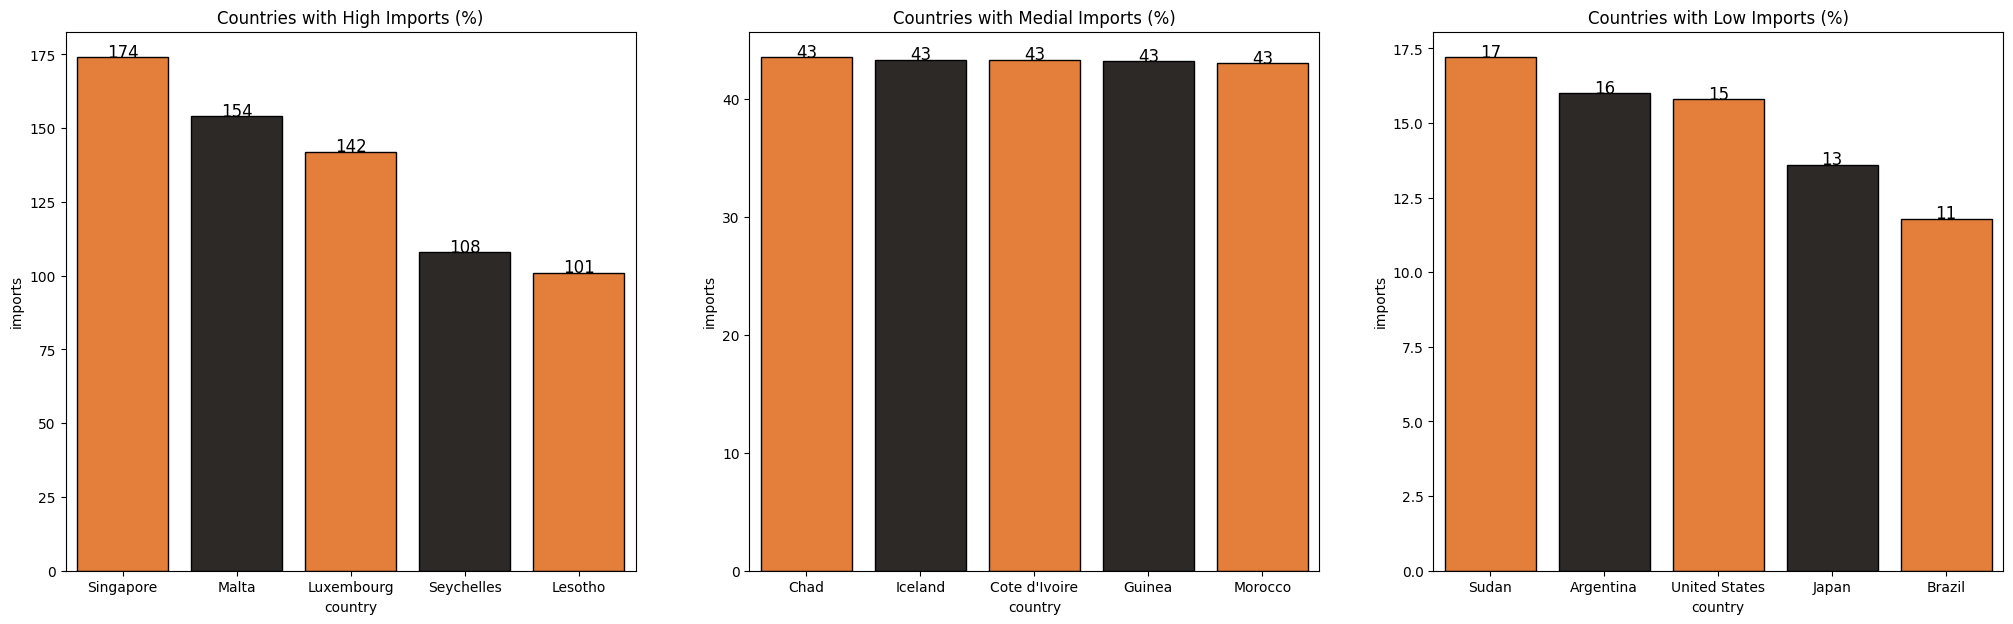

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

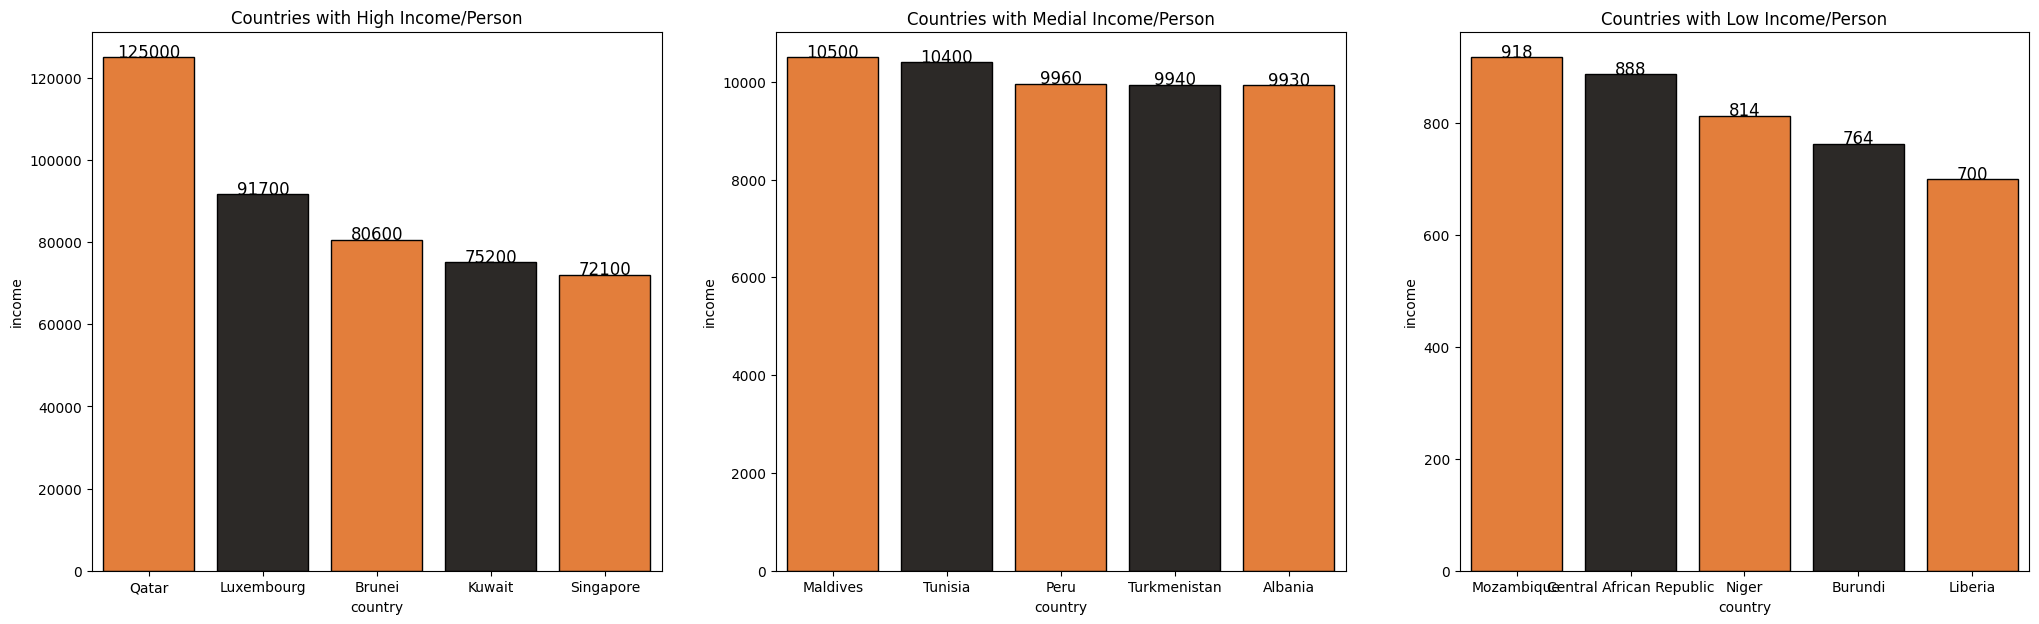

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

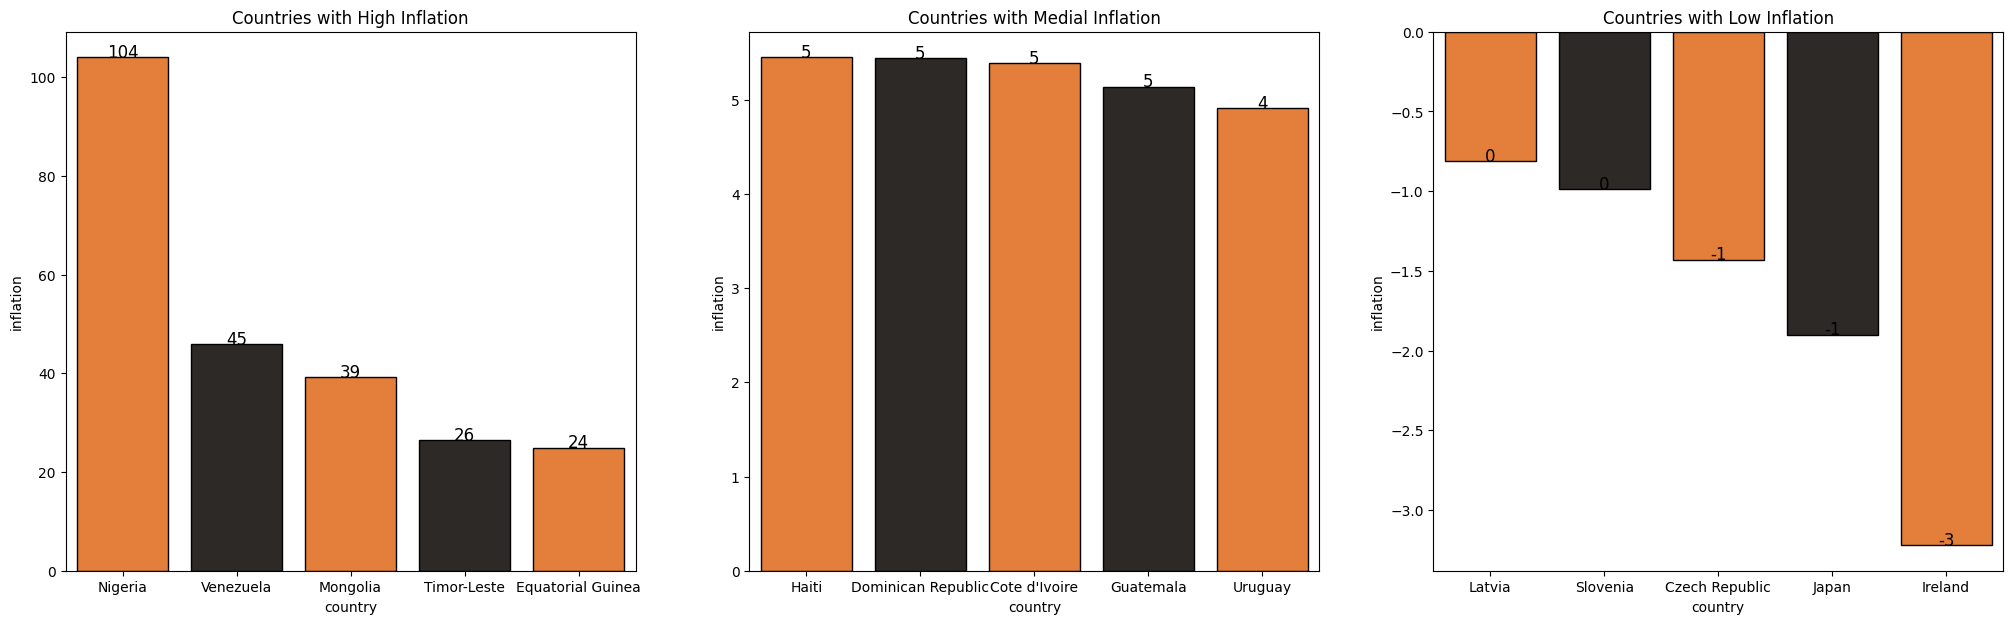

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

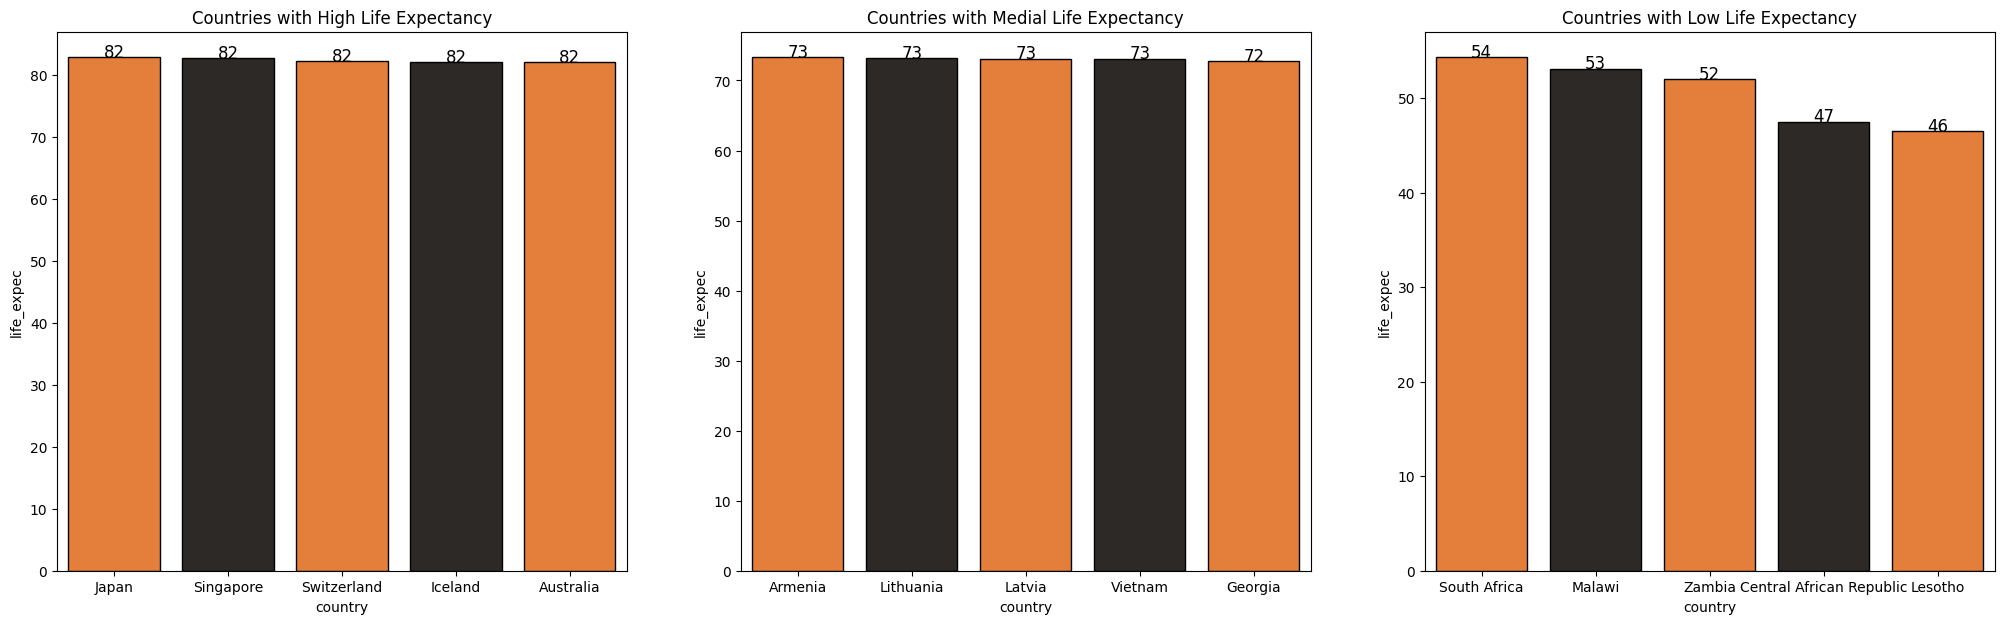

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

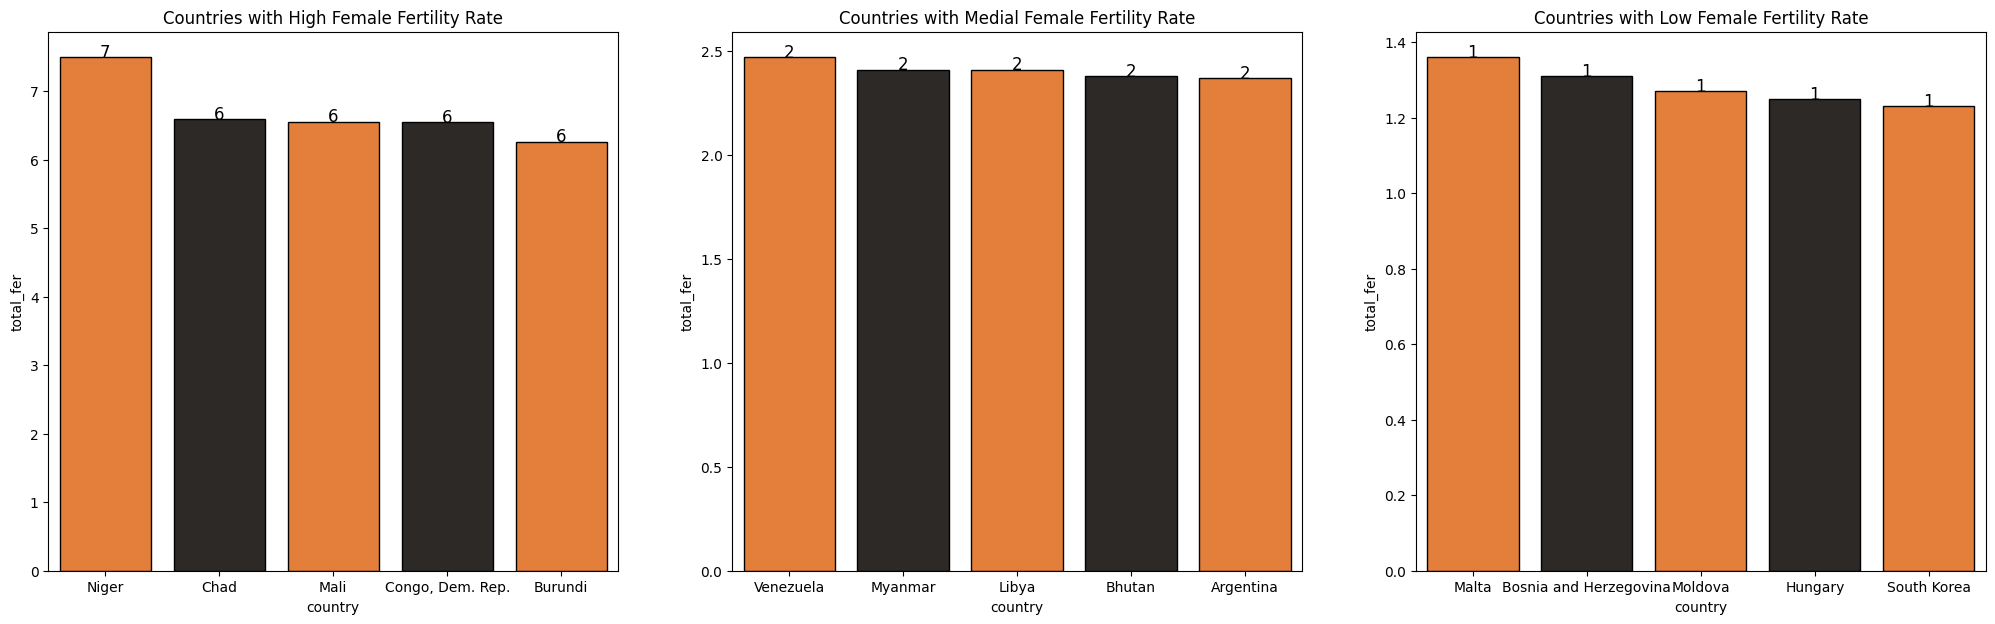

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

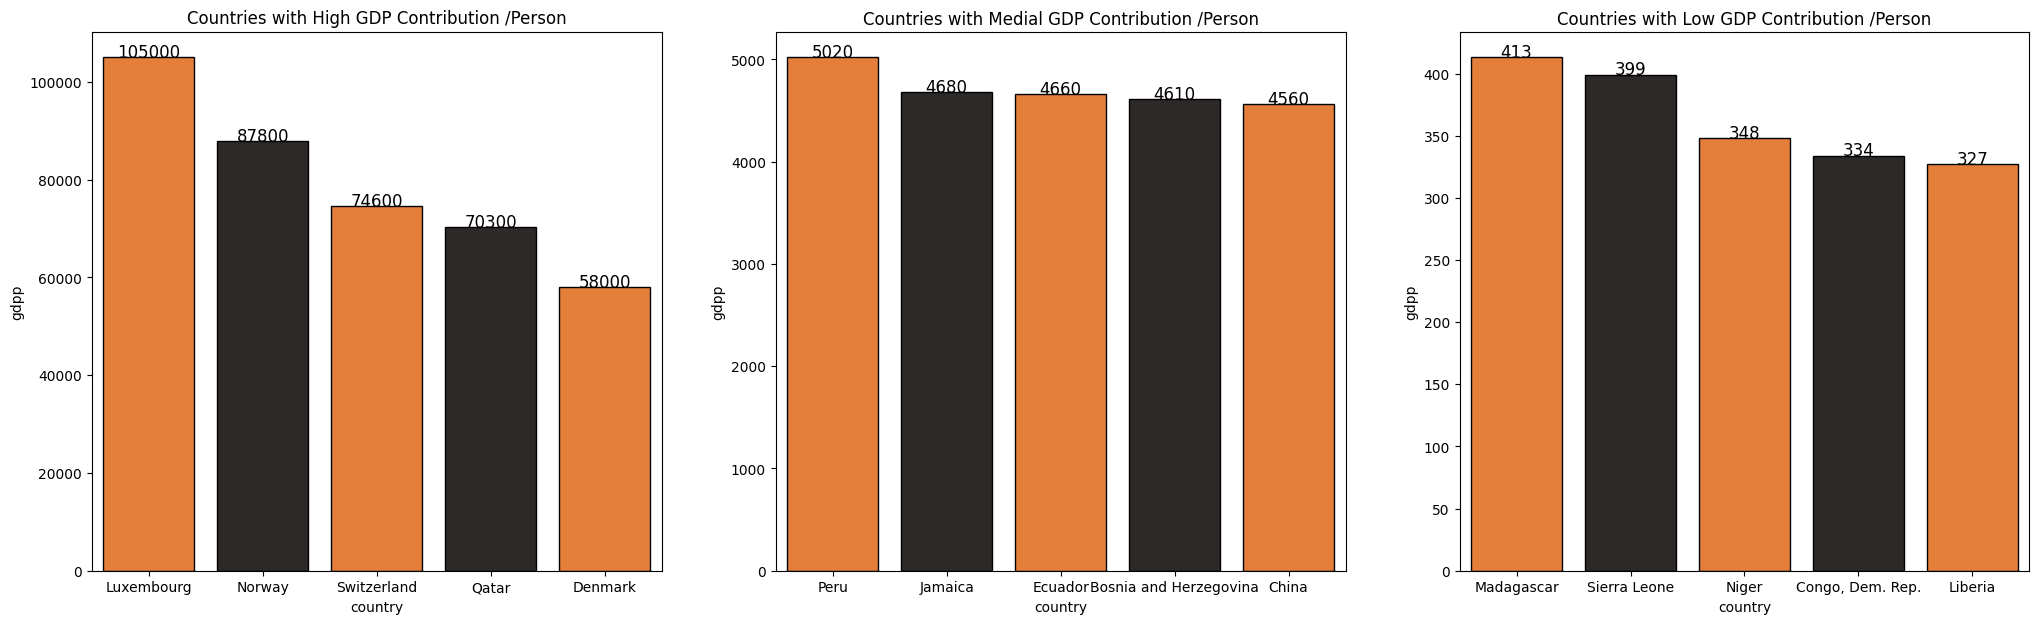

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

## Gráficos de las variables númericas con boxplot

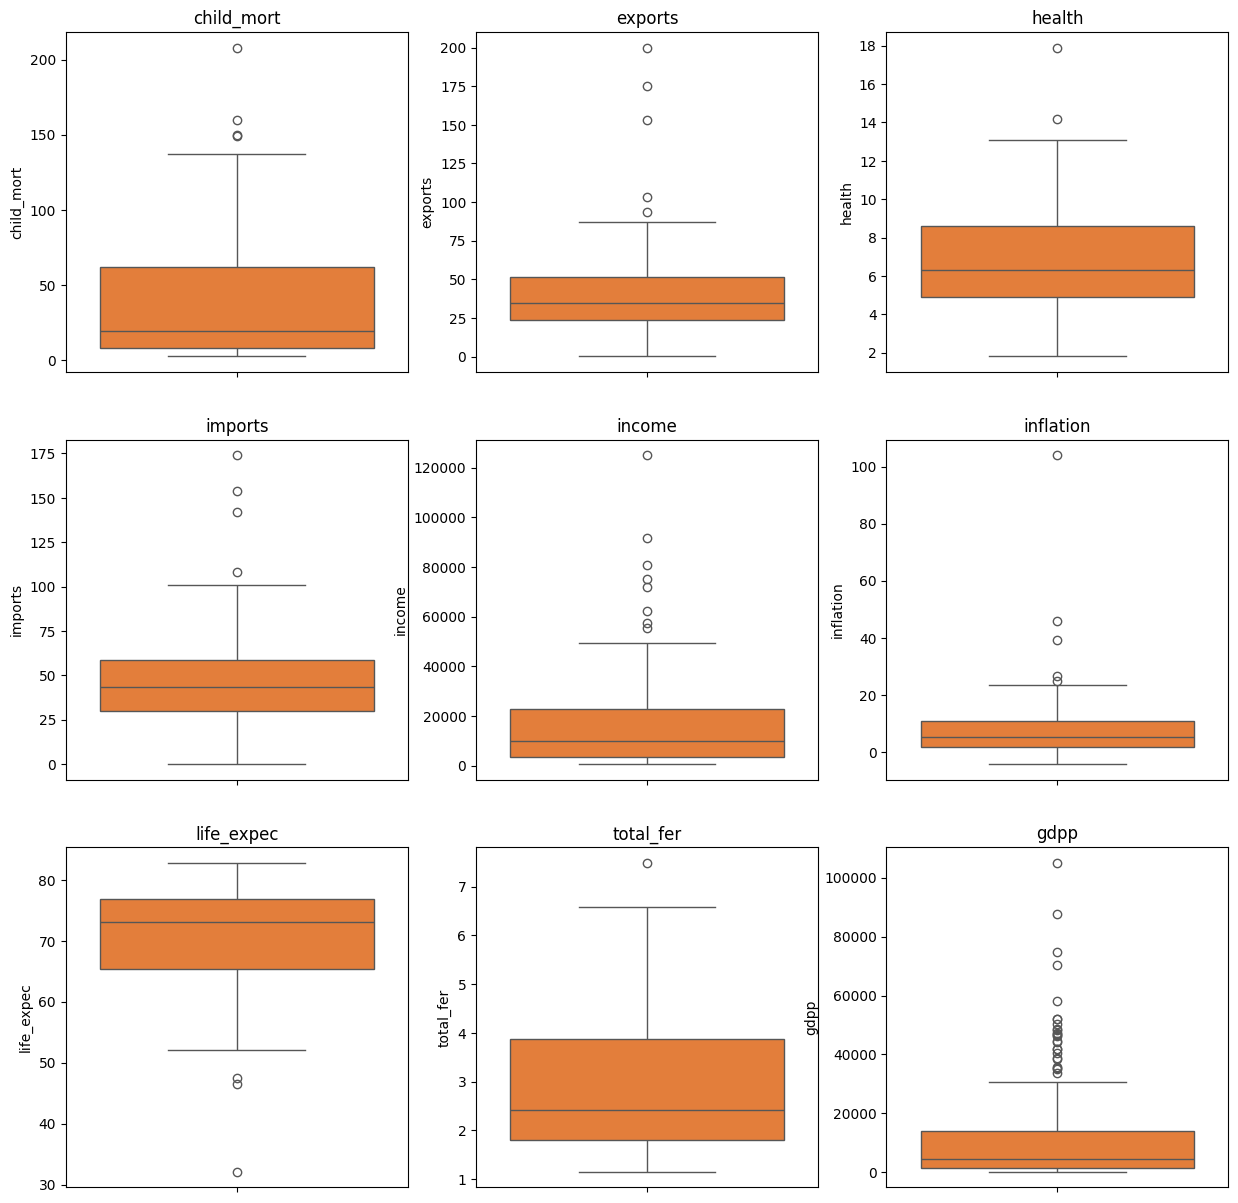

In [ ]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

#  Ingeniería de características
Transformaremos datos sin procesar en características que se puedan utilizar para el entrenamiento y la predicción.

Matriz de Correlacion

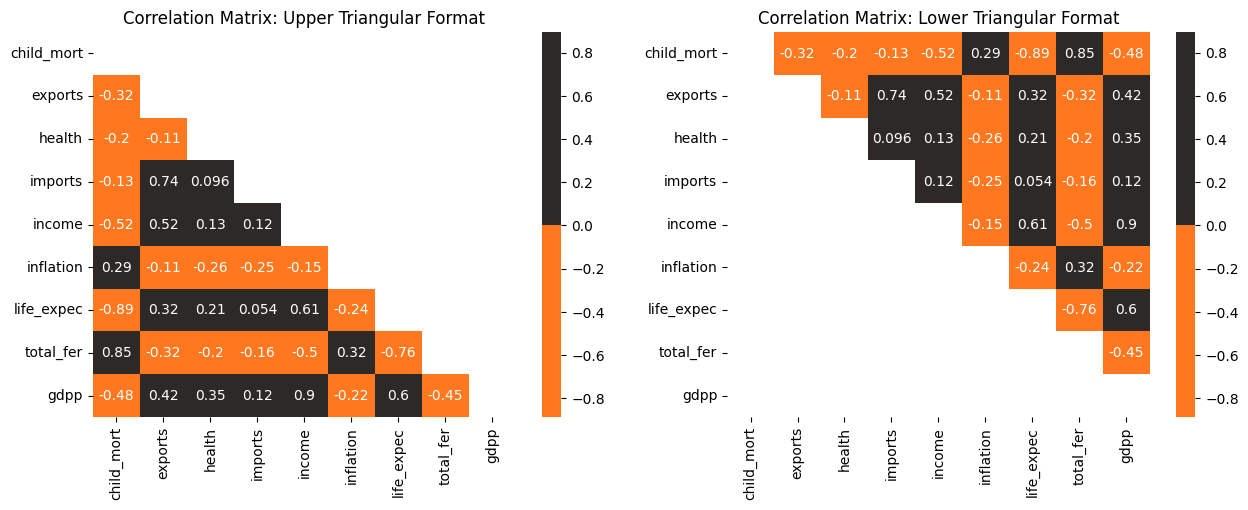

In [ ]:
# Eliminar la columna 'country' y calcular la matriz de correlación solo con las columnas numéricas
data_numeric = data.drop(columns='country')
ut = np.triu(data_numeric.corr())
lt = np.tril(data_numeric.corr())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Graficar la matriz de correlación triangular superior
plt.subplot(1, 2, 1)
sns.heatmap(data_numeric.corr(), cmap=colors, annot=True, cbar=True, mask=ut)
plt.title('Correlation Matrix: Upper Triangular Format')

# Graficar la matriz de correlación triangular inferior
plt.subplot(1, 2, 2)
sns.heatmap(data_numeric.corr(), cmap=colors, annot=True, cbar=True, mask=lt)
plt.title('Correlation Matrix: Lower Triangular Format')

plt.show()


Con la matriz de correlación obtenemos las principales características para determinar cómo podemos reducir la dimensionalidad para poder hacer el método de PCA, concluimos estos 3 principales conjuntos: "Health", "Trade", "Finance"

In [ ]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

Health  Trade  Finance
0    6.24   1.20     1.35
1    3.04   1.72     1.47
2    3.39   1.60     3.17
3    6.47   2.43     3.49
4    2.96   2.36     2.24

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalizacion (ajuste para que los valores queden a rango de 0 a 1)
ss = StandardScaler() # Estandardizacion (ajuste a una media de 0 y desviación estándar de 1).

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country') #Añadimos los paises
df1.head()

Country  Health  Trade  Finance
0          Afghanistan    0.63   0.14     0.08
1              Albania    0.13   0.20     0.09
2              Algeria    0.18   0.19     0.21
3               Angola    0.66   0.28     0.24
4  Antigua and Barbuda    0.12   0.28     0.15

In [ ]:
df2 = data.copy(deep = True) #Copia de los datos

col = list(data.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Estandardizacion

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalizacion de datos
df2.drop(columns = 'country',inplace = True)
df2.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        0.43     0.05    0.28     0.26    0.01       0.13        0.48   
1        0.07     0.14   -0.10     0.28    0.07       0.08        0.87   
2        0.12     0.19   -0.97     0.18    0.10       0.19        0.88   
3        0.57     0.31   -1.45     0.25    0.04       0.25        0.55   
4        0.04     0.23   -0.29     0.34    0.15       0.05        0.88   

   total_fer  gdpp  
0       0.74  0.00  
1       0.08  0.04  
2       0.27  0.04  
3       0.79  0.03  
4       0.15  0.11

Le aplicamos a df2 el pca para hacer la comparación de resultados, esperando que df2 sea más óptimo que

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

Cantidad de  componentes principales a usar para capturar eficientemente la información en los datos, eliminando el ruido

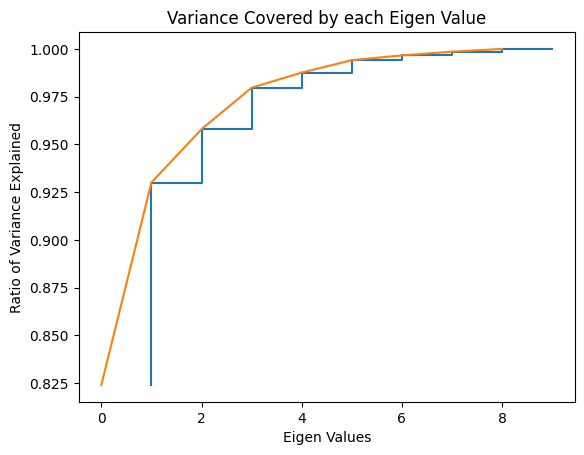

In [ ]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [ ]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

0     1     2
0  0.22  0.64  0.09
1 -0.08 -0.17 -0.21
2 -0.96 -0.13 -0.13
3 -1.51  0.47  0.28
4 -0.26 -0.24 -0.06

# Modeling

In [ ]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

# Modelo Kmeans

Hacemos método de codo y Silhouette para determinar el método óptimo de k, en este caso 3, asi mismo implementar la metrica de evaluación

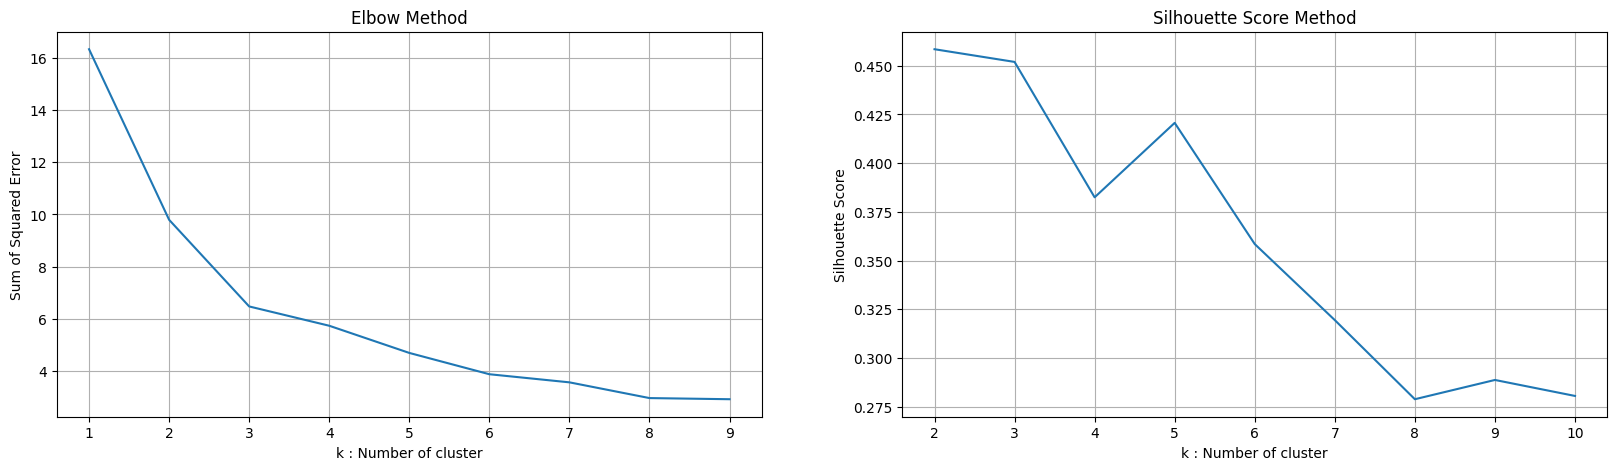

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

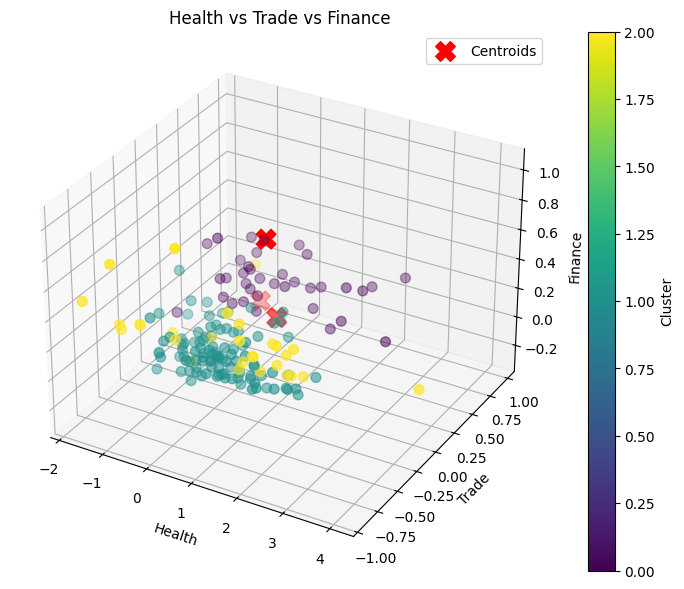

In [ ]:
# Crear y ajustar el modelo KMeans
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m1)
centroids = model.cluster_centers_
labels = model.labels_

# Crear la figura 3D para mejor visualización
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos del conjunto de datos con los colores de los clusters
scatter = ax.scatter(m2[:, 0], m2[:, 1], m2[:, 2], c=labels, cmap='viridis', s=50)

# Graficar los centroides de los clusters
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='red', s=200, label='Centroids')

plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')

# Añadir una barra de colores para interpretar los clusters
fig.colorbar(scatter, ax=ax, label='Cluster')

ax.legend()
plt.show()

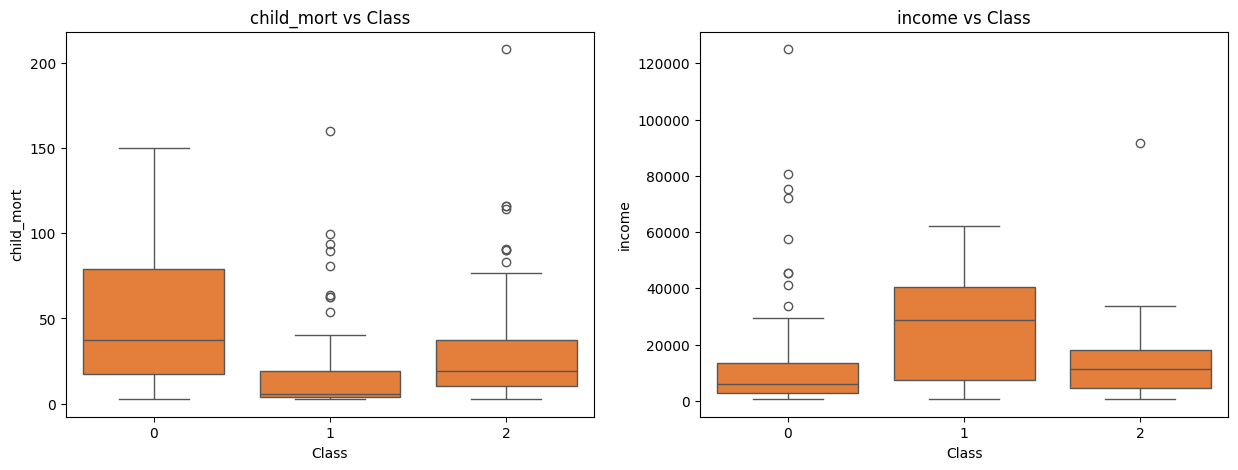

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()
#Comparacion de diferentes variables que son condicionales para el ejercicio

Hacemos los gráficos para la comparación de clustering en df1 y df2

In [ ]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')#Mapa de los paises que necesitan ayuda por areas de diferentes colores representativos

### **PCA Data:**

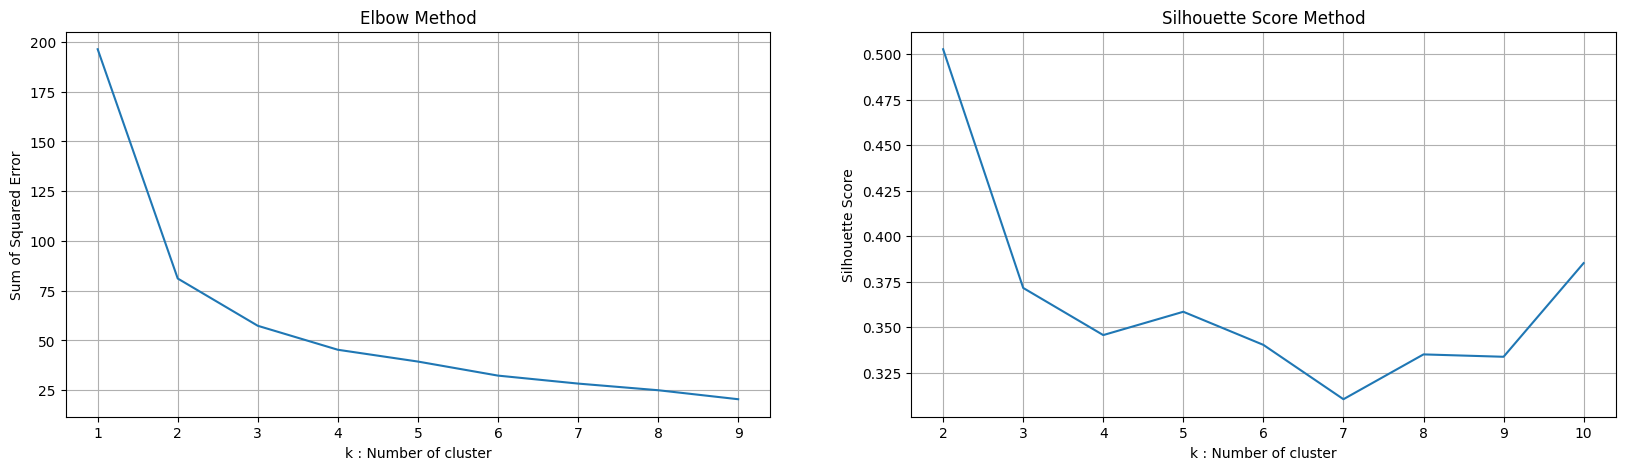

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

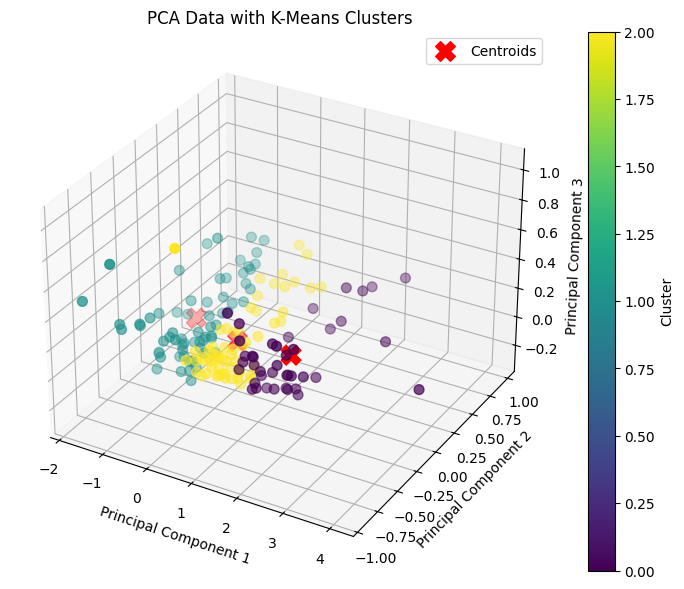

In [ ]:
# Crear y ajustar el modelo KMeans
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m2)
centroids = model.cluster_centers_
labels = model.labels_

# Crear la figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos del conjunto de datos con los colores de los clusters
scatter = ax.scatter(m2[:, 0], m2[:, 1], m2[:, 2], c=labels, cmap='viridis', s=50)

# Graficar los centroides de los clusters
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='red', s=200, label='Centroids')


plt.title('PCA Data with K-Means Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Añadir una barra de colores para interpretar los clusters
fig.colorbar(scatter, ax=ax, label='Cluster')

ax.legend()
plt.show()

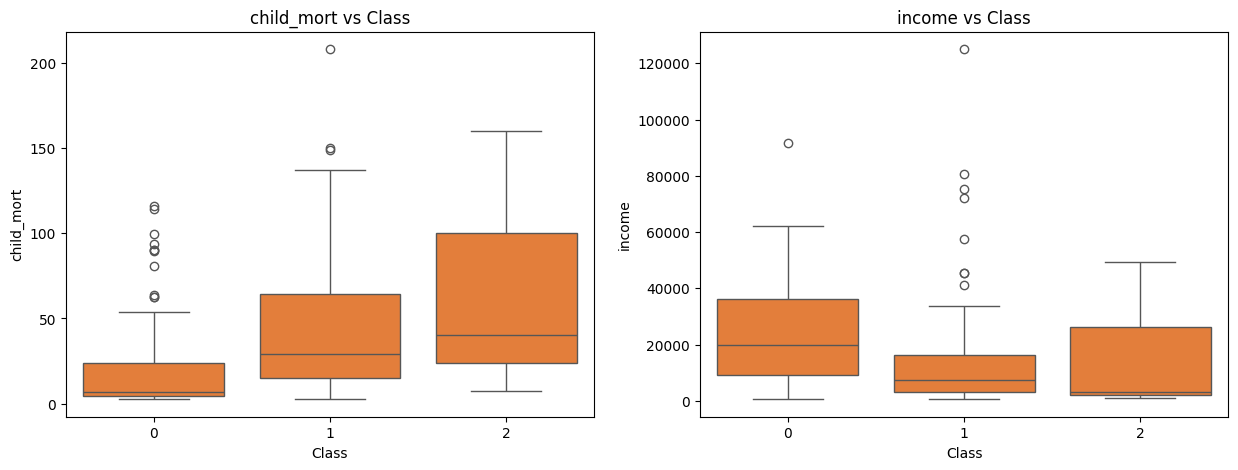

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [ ]:
pca_df2.insert(0,column = 'Country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

Podemos visualizar que df2 representa la condición socioeconómica más acertada en los diferentes paises del mundo. Así mismo demostramos el método de clustering